<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [6]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscribtion_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [5]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [7]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [8]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [9]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscribtion_history, on=['ID'])

In [10]:
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df.shape

(45211, 18)

In [12]:
df = df.drop(['ID'], axis=1)

### Task 4: Data Prep & Start H2O

In [21]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp01zb3nlx
  JVM stdout: /tmp/tmp01zb3nlx/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmp01zb3nlx/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,"1 year, 9 months and 21 days !!!"
H2O_cluster_name:,H2O_from_python_rhyme_ka3n53
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [22]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


enum means catorgery

In [23]:
train, test = h2o_df.split_frame(ratios=[.75])

x = train.columns
y = 'TERM_DEPOSIT' # 定期存款
x.remove(y)

### Task 5: Run H2O AutoML

In [24]:
from h2o.automl import H2OAutoML

In [18]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [25]:
# 这个函数比较关键，很多相关的参数配置
aml = H2OAutoML(max_runtime_secs=600,
               exclude_algos=['DeepLearning'],
               balance_classes=True,
                stopping_metric='logloss',
               project_name='Final',
               seed=1)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 2min 12s, sys: 1.22 s, total: 2min 14s
Wall time: 9min 28s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [26]:
#auc
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20220307_114355,0.938715,0.217691,0.641616,0.156802,0.254042,0.0645372
StackedEnsemble_AllModels_AutoML_20220307_114355,0.937848,0.211428,0.63315,0.168757,0.251915,0.0634611
XGBoost_grid__1_AutoML_20220307_114355_model_2,0.936751,0.196166,0.634548,0.165265,0.24825,0.0616282
XGBoost_grid__1_AutoML_20220307_114355_model_5,0.936384,0.196066,0.632997,0.184971,0.247848,0.0614286
GBM_grid__1_AutoML_20220307_114355_model_2,0.934416,0.204822,0.625615,0.17904,0.254221,0.0646284
GBM_grid__1_AutoML_20220307_114355_model_1,0.934286,0.19869,0.618324,0.174233,0.250367,0.0626838
XGBoost_grid__1_AutoML_20220307_114355_model_1,0.933405,0.200994,0.623007,0.170158,0.25137,0.0631869
GBM_2_AutoML_20220307_114355,0.932629,0.215165,0.614302,0.167187,0.260692,0.0679604
XGBoost_3_AutoML_20220307_114355,0.932475,0.201881,0.620442,0.179979,0.250848,0.0629247
GBM_5_AutoML_20220307_114355,0.93121,0.232578,0.602477,0.168659,0.271304,0.073606


In [28]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [29]:
metalearner.varimp() # model collected together

[('XGBoost_grid__1_AutoML_20220307_114355_model_2',
  0.8983407774017412,
  1.0,
  0.6099948127590904),
 ('GBM_grid__1_AutoML_20220307_114355_model_2',
  0.4891128169458659,
  0.5444624459334021,
  0.33211926776150197),
 ('GLM_1_AutoML_20220307_114355',
  0.059642012452439025,
  0.06639130044273489,
  0.04049834888239858),
 ('XRT_1_AutoML_20220307_114355',
  0.025606715599094144,
  0.028504456486052095,
  0.01738757059700899),
 ('DRF_1_AutoML_20220307_114355', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [30]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20220307_114355_model_2')

In [31]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.065222450767985
RMSE: 0.255386864908877
LogLoss: 0.20778844318925047
Mean Per-Class Error: 0.13332370359117962
AUC: 0.9278261029275309
AUCPR: 0.6006507891752237
Gini: 0.8556522058550617

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21618836124738058: 


,,no,yes,Error,Rate
0,no,8940.0,997.0,0.1003,(997.0/9937.0)
1,yes,303.0,1012.0,0.2304,(303.0/1315.0)
2,Total,9243.0,2009.0,0.1155,(1300.0/11252.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.216188,0.608905,240.0
1,max f2,0.113720,0.731111,292.0
2,max f0point5,0.471568,0.596555,149.0
3,max accuracy,0.536675,0.906950,127.0
4,max precision,0.913081,0.849462,18.0
5,max recall,0.000787,1.000000,397.0
6,max specificity,0.981144,0.999899,0.0
7,max absolute_mcc,0.196378,0.561784,249.0
8,max min_per_class_accuracy,0.133423,0.857704,281.0
9,max mean_per_class_accuracy,0.087649,0.866676,308.0



Gains/Lift Table: Avg response rate: 11.69 %, avg score: 11.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010043,0.894593,6.966479,6.966479,0.814159,0.937330,0.814159,0.937330,0.069962,0.069962,596.647936,596.647936
1,,2,0.020085,0.820287,5.982086,6.474282,0.699115,0.860684,0.756637,0.899007,0.060076,0.130038,498.208553,547.428245
2,,3,0.030039,0.765302,5.882700,6.278255,0.687500,0.792945,0.733728,0.863862,0.058555,0.188593,488.269962,527.825500
3,,4,0.040082,0.698820,5.376305,6.052267,0.628319,0.729717,0.707317,0.830252,0.053992,0.242586,437.630472,505.226746
4,,5,0.050036,0.648904,5.424307,5.927345,0.633929,0.675273,0.692718,0.799421,0.053992,0.296578,442.430744,492.734468
5,,6,0.100071,0.445418,4.513901,5.220623,0.527531,0.543208,0.610124,0.671314,0.225856,0.522433,351.390095,422.062282
6,,7,0.150018,0.280324,3.410481,4.617957,0.398577,0.361943,0.539692,0.568313,0.170342,0.692776,241.048131,361.795722
7,,8,0.200053,0.171839,2.446929,4.074959,0.285968,0.222650,0.476233,0.481859,0.122433,0.815209,144.692947,307.495916
8,,9,0.300036,0.066706,1.156099,3.102294,0.135111,0.109384,0.362559,0.357737,0.115589,0.930798,15.609903,210.229398
9,,10,0.400018,0.030574,0.441143,2.437154,0.051556,0.045809,0.284826,0.279772,0.044106,0.974905,-55.885695,143.715406


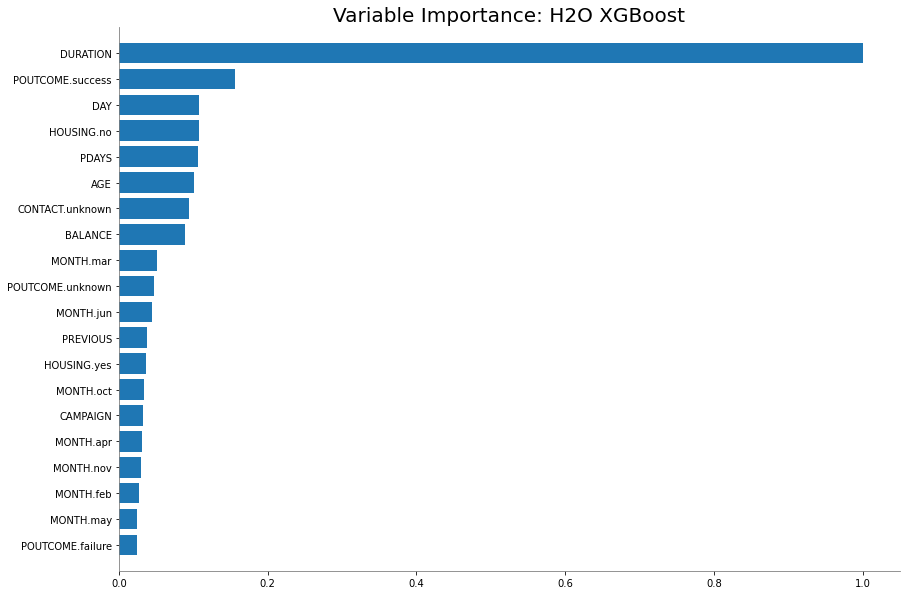

In [33]:
model.varimp_plot(num_of_features=20)